In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('04_fake_reg.csv')

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

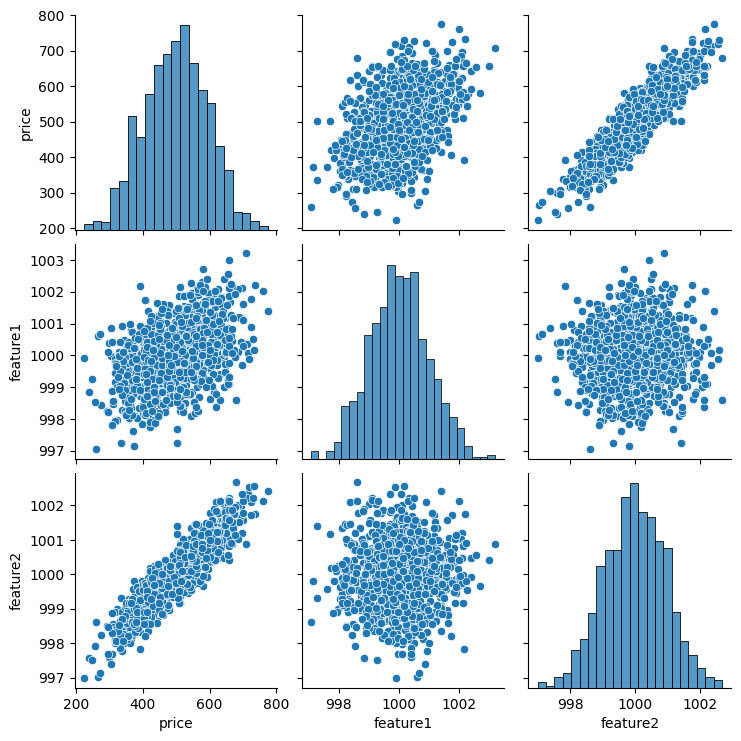

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1','feature2']].values
y= df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
y_test.shape

(300,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
 |  scales them down into a fixed range, where the largest occurring data point
 |  corresponds to the maximum value and the smallest one 

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'n_features_in_': 2,
 'n_samples_seen_': 700,
 'scale_': array([0.16490676, 0.17963556]),
 'min_': array([-164.4357727 , -179.09587293]),
 'data_min_': array([997.14390096, 996.99565097]),
 'data_max_': array([1003.20793365, 1002.56247747]),
 'data_range_': array([6.06403269, 5.5668265 ])}

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When using the delayed-build 

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

In [ ]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

In [ ]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
%%time
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 256322.7188
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 253310.2344
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 251865.1094
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258236.6250 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254300.9531 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255374.1562 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249391.6562 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256182.5312 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256834.9062 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260363.0469 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253232.8750 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252471.6875 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256766.2188 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253

In [ ]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Training Loss per Epoch')

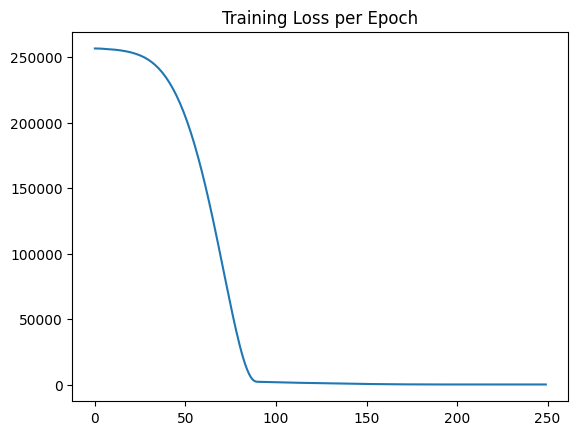

In [ ]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Training Loss per Epoch")

In [ ]:
model.metrics_names

['loss']

In [ ]:
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
training_score

24.635953903198242

In [ ]:
test_score

26.988130569458008

In [ ]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
test_predictions

array([[406.25327],
       [625.107  ],
       [593.6841 ],
       [573.7472 ],
       [367.43295],
       [580.714  ],
       [516.3844 ],
       [460.263  ],
       [550.7016 ],
       [448.63614],
       [613.3461 ],
       [550.4206 ],
       [420.1104 ],
       [409.84277],
       [652.85297],
       [438.3777 ],
       [509.78464],
       [661.5022 ],
       [664.1678 ],
       [567.0623 ],
       [334.93802],
       [445.93393],
       [383.40622],
       [379.6272 ],
       [568.1176 ],
       [612.1385 ],
       [533.7936 ],
       [428.90353],
       [657.0184 ],
       [415.08084],
       [443.73456],
       [486.3687 ],
       [439.49408],
       [683.4432 ],
       [425.79773],
       [418.6875 ],
       [503.24042],
       [551.944  ],
       [511.04968],
       [396.27414],
       [620.1611 ],
       [417.63535],
       [606.0091 ],
       [447.07416],
       [503.2882 ],
       [583.28284],
       [670.6184 ],
       [491.66708],
       [319.24792],
       [486.66797],


In [ ]:
pred_df = pd.DataFrame(y_test, columns=['Test Y'])

In [ ]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [ ]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [ ]:
test_predictions

,0
0,406.253265
1,625.106995
2,593.684082
3,573.747192
4,367.432953
...,...
295,530.432129
296,516.593201
297,611.212708
298,417.965179


In [ ]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [ ]:
pred_df.columns = ['Test Y', 'Model Predictions']

In [ ]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.253265
1,624.156198,625.106995
2,582.455066,593.684082
3,578.588606,573.747192
4,371.224104,367.432953
...,...,...
295,525.704657,530.432129
296,502.909473,516.593201
297,612.727910,611.212708
298,417.569725,417.965179


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

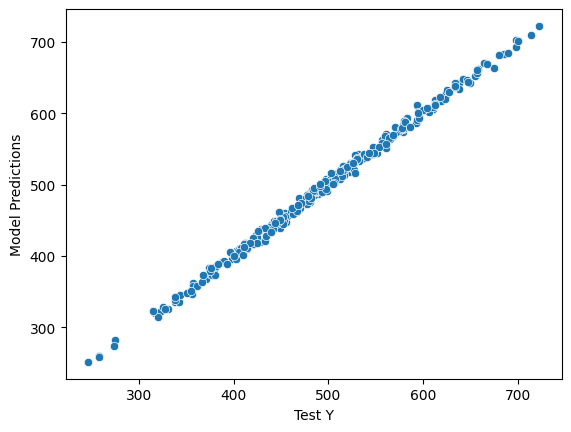

In [ ]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)

In [ ]:
pred_df["Error"] = pred_df['Test Y'] - pred_df['Model Predictions']

<ipython-input-42-651187a30b39>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'], bins=50)


<Axes: xlabel='Error', ylabel='Density'>

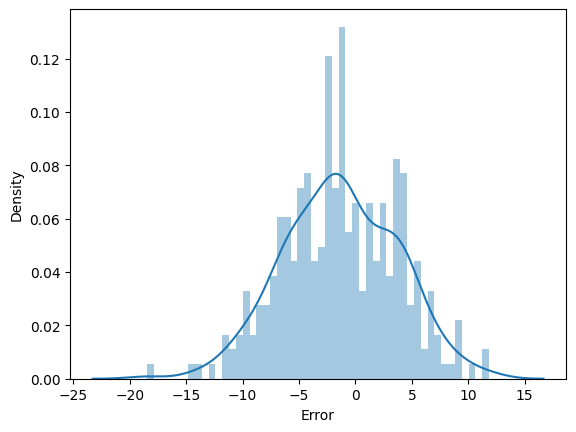

In [ ]:
sns.distplot(pred_df['Error'], bins=50)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])

4.209824993702723

In [ ]:
(4.11/498.67)*100

0.8241923516554034

In [ ]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [ ]:
mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])

26.988131748625428

In [ ]:
test_score

26.988130569458008

In [ ]:
test_score**0.5

5.195010160669371

In [ ]:
new_gem = [[998,1000]]

In [ ]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [ ]:
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[420.68805]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.keras')

In [ ]:
latter_model = load_model('my_model.keras')

In [ ]:
latter_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[420.68805]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59 (240.00 B)